# CLASSIFICATION USING ANN AND SVM

In [ ]:
Kelompok 3:
2502398571 - Muhammad Rikhza Maulana
2502398615 - Anatha Pindhika Hermawan
2502399366 - Gabriel Rolly Davinsi 

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('Churn_Dataset.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# DATA PREPROCESSING

In [41]:
# Removing the unnecassary features from the dataset

data = data.drop('Surname', axis=1)
data = data.drop('RowNumber', axis=1)
data = data.drop('CustomerId', axis=1)


In [42]:
# splitting the dataset into x(independent variables) and y(dependent variables)

# Independent variables
X = data.drop('Exited', axis=1)

# Dependent variable
y = data['Exited']

X.head(), y.head()

(   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619    France  Female   42       2       0.00              1   
 1          608     Spain  Female   41       1   83807.86              1   
 2          502    France  Female   42       8  159660.80              3   
 3          699    France  Female   39       1       0.00              2   
 4          850     Spain  Female   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  
 0          1               1        101348.88  
 1          0               1        112542.58  
 2          1               0        113931.57  
 3          0               0         93826.63  
 4          1               1         79084.10  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

In [43]:
#split
X_encoded=pd.get_dummies(X, columns=["Gender", "Geography"])
print(X_encoded)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
0                  1        101348.88           True        False   
1        

In [44]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting data splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((8000, 13), (2000, 13), (8000,), (2000,))

In [ ]:
Penggunaan MinMaxScaler berguna untuk mengubah rentang nilai fitur menjadi rentang yang diinginkan (dalam hal ini, -1 hingga 1). 
Hal ini membantu model untuk lebih mudah dan stabil dalam mempelajari pola pada data, 
terutama jika ada perbedaan rentang nilai yang besar antara fitur-fitur.

In [84]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-1, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.81125
Testing Accuracy : 0.81
[[1537   70]
 [ 310   83]]


# SUPPORT  VECTOR MACHINE

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.837875
Testing Accuracy : 0.841
[[1591   16]
 [ 302   91]]


In [48]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.835   0.8375  0.8275  0.8175  0.8425  0.82    0.845   0.82875 0.84125
 0.83625]


# MULTILAYER ANN

In [ ]:
Pada kodingan di bawah ini kami menambahkan 3 activasi relu (hidden layer) atau 3 lapisan tersembunyi dengan jumlah neuron masing 6, 18 dan 32, 
serta activasi sigmoid dengan 1 neuron.
Pemilihan jumlah neuron ini dapat mempengaruhi kapasitas model dan kemampuannya untuk mempelajari pola dalam data. Jumlah neuron yang lebih besar dapat memungkinkan model 
untuk memahami pola yang lebih kompleks, tetapi juga dapat meningkatkan risiko overfitting, terutama jika data pelatihan terbatas. Sebaliknya, 
jumlah neuron yang lebih kecil dapat mengurangi risiko overfitting, tetapi mungkin kurang mampu memodelkan pola yang kompleks dalam data. 
Pemilihan arsitektur model ini dapat menjadi bagian dari proses eksperimen dan penyesuaian saat membangun model.

Menariknya dengan model ini kami menemukan bahwa accuracy testing jauh lebih baik dari training sebagai salah satu indikasi ketaktersediaannya overfitting, 
ketimbang model-model sebelumnya dengan jumlah neuron dan hidden layer yang jauh lebih sedikit.

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Initialising ANN
input_shape = x_train.shape[1:]

# define the keras model
model = Sequential()
model.add(Dense(6, input_shape=(input_shape), activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
Kami menambahkan jumlah iterasi dan junmlah sampel yang digunakan. Batch_File yang ditambah emungkinkan model untuk melihat sekelompok sampel sekaligus 
dan mempercepat proses pelatihan meskipun resikonya harus menyiapkan memori yang lebih besar. Namun sejauh ini dengan menambahkan jumlah sampel tingkat akurasinya 
terus menunjukan peningkatan.

In [80]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=30)

Epoch 1/50
267/267 [==============================] - 4s 7ms/step - loss: 0.5068 - accuracy: 0.7897 - val_loss: 0.4556 - val_accuracy: 0.8035
Epoch 2/50
267/267 [==============================] - 1s 5ms/step - loss: 0.4618 - accuracy: 0.7934 - val_loss: 0.4419 - val_accuracy: 0.8040
Epoch 3/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4499 - accuracy: 0.7989 - val_loss: 0.4322 - val_accuracy: 0.8095
Epoch 4/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4384 - accuracy: 0.8071 - val_loss: 0.4203 - val_accuracy: 0.8120
Epoch 5/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4285 - accuracy: 0.8121 - val_loss: 0.4120 - val_accuracy: 0.8220
Epoch 6/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.8158 - val_loss: 0.4074 - val_accuracy: 0.8235
Epoch 7/50
267/267 [==============================] - 1s 5ms/step - loss: 0.4162 - accuracy: 0.8220 - val_loss: 0.3969 - val_accuracy: 0.8320
Epoch 

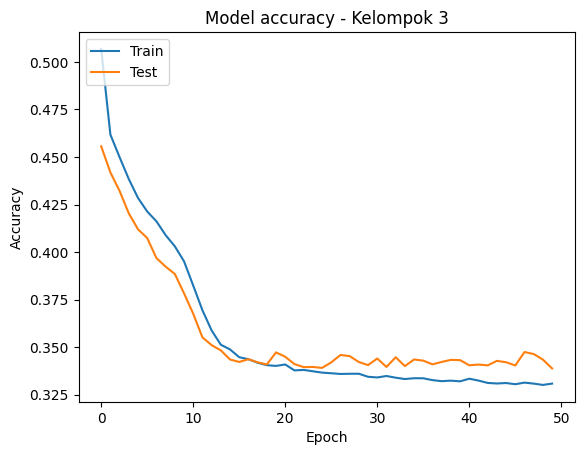

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy - Kelompok 3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [82]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 1, 0, 0]]))) 

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

C:\Users\Davinci\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 172ms/step
[[ True]]
